In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.datasets import make_imbalance

__1. Load csv correctly into a DataFrame and show contents in a cell__

In [63]:
df = pd.read_csv("online_shoppers_intention_cs4364.csv")

In [64]:
# arrange the row label starting from 1
df.index = np.arange(1,len(df)+1)
# Transfer "Revenue" and "Weekend" features into Bin
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
2,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
3,0,0.0,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
4,0,0.0,0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
5,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12327,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12328,0,0.0,0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12329,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


__2. Holdout dataset split as specified__

In [65]:
# splitting dataframe by row index
df_train = df.iloc[:9999,:]
df_holdout = df.iloc[9999:,:]

In [66]:
df_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0000,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
2,0,0.0000,0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
3,0,0.0000,0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
4,0,0.0000,0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
5,0,0.0000,0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,8.0000,2,134.5,21.0,507.291667,0.008333,0.031944,0.000000,0.0,Nov,2,10,1,1,Returning_Visitor,0,1
9996,0,0.0000,2,6.0,7.0,162.625000,0.000000,0.022222,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,1,0
9997,0,0.0000,0,0.0,12.0,442.500000,0.000000,0.008333,0.000000,0.0,Nov,2,2,1,2,New_Visitor,0,0
9998,0,0.0000,0,0.0,4.0,185.000000,0.050000,0.100000,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,0,0


In [67]:
df_holdout

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10000,4,142.50,0,0.0,56.0,1885.337440,0.010714,0.038102,5.040168,0.0,Nov,2,5,3,11,Returning_Visitor,0,1
10001,9,965.50,0,0.0,30.0,1895.133333,0.005405,0.011186,0.000000,0.0,Dec,3,2,3,2,Returning_Visitor,1,0
10002,1,22.00,3,39.0,80.0,1903.081639,0.007229,0.032249,0.000000,0.0,Dec,3,2,1,2,Returning_Visitor,0,0
10003,0,0.00,0,0.0,42.0,2872.125000,0.002500,0.025778,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,1,0
10004,9,196.25,1,62.5,6.0,148.750000,0.000000,0.020000,0.000000,0.0,Dec,4,1,9,2,Returning_Visitor,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,3,145.00,0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12327,0,0.00,0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12328,0,0.00,0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12329,4,75.00,0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


__3. Correct explanation generalization from such a holdout split__

The split is not a good idea from the perspective of generalization. Because when we are doing splits, it should be follow the principle of random assignment. Whereas the dataframe is not totally random placed. E.g., for the "Month" feature, "Feb" is mostly in the first 200 rows, and from 10000 to 12330 only contains "Nov" and "Dec". Thus the model trained would work poorly and predict badly on the holdout set.

__4. Use value_counts() in pandas to print out the distributions of the categorical and ordinal numbered features (treat SpecialDay as categorical here). Turn on the setting to reveal missing data -- how many features, and what percent of them, were missing? Discuss in markdown in your notebook.__

In [68]:
# Feature 1: "Administrative"
print(df["Administrative"].value_counts())

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64


In [69]:
# Feature 2: "Administrative_Duration"
print(df["Administrative_Duration"].value_counts())

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64


In [70]:
# Feature 3: "Informational"
print(df["Informational"].value_counts())

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64


In [71]:
# Feature 4: "Informational_Duration"
print(df["Informational_Duration"].value_counts())

0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64


In [72]:
# Feature 5: "ProductRelated"
print(df["ProductRelated"].value_counts())

1.0      588
2.0      443
3.0      438
4.0      383
6.0      382
        ... 
440.0      1
584.0      1
293.0      1
165.0      1
192.0      1
Name: ProductRelated, Length: 311, dtype: int64


In [73]:
# Feature 6: "ProductRelated_Duration"
print(df["ProductRelated_Duration"].value_counts())

0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64


In [74]:
# Feature 7: "BounceRates"
print(df["BounceRates"].value_counts())

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64


In [75]:
# Feature 8: "ExitRates"
print(df["ExitRates"].value_counts())

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64


In [76]:
# Feature 9: "PageValues"
print(df["PageValues"].value_counts())

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64


In [77]:
# Feature 10: "SpecialDay"
print(df["SpecialDay"].value_counts())

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64


In [78]:
# Feature 11: "Month"
print(df["Month"].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [79]:
# Feature 12: "OperatingSystems"
print(df["OperatingSystems"].value_counts())

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


In [80]:
# Feature 13: "Browser"
print(df["Browser"].value_counts())

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


In [81]:
# Feature 14: "Region"
print(df["Region"].value_counts())

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


In [82]:
# Feature 15: "TrafficType"
print(df["TrafficType"].value_counts())

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


In [83]:
# Feature 16: "VisitorType"
print(df["VisitorType"].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [84]:
# Feature 17: "Weekend"
print(df["Weekend"].value_counts())

0    9462
1    2868
Name: Weekend, dtype: int64


In [85]:
# Feature 18: "Revenue"
print(df["Revenue"].value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64


In [86]:
# calculate the percentage of missing data in all features
missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             0.00000
Administrative_Duration    0.00000
Informational              0.00000
Informational_Duration     0.00000
ProductRelated             0.02717
ProductRelated_Duration    0.00000
BounceRates                0.00000
ExitRates                  0.00000
PageValues                 0.00000
SpecialDay                 0.00000
Month                      0.00000
OperatingSystems           0.00000
Browser                    0.00000
Region                     0.00000
TrafficType                0.00000
VisitorType                0.00000
Weekend                    0.00000
Revenue                    0.00000
dtype: float64


As shown above, only "ProductRelated" feature has 2.717% of data missing

__5. Use the describe() method in pandas to print out summary statistics. Discuss which features you will have to consider more carefully, based on these results.__

In [87]:
# Use describe() to print out summary statistics for the dataframe
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,11995.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,NaN,NaN
mean,2.315166,80.818611,0.503569,34.472398,32.122134,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.898778,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,0.000000,0.000000


I would consider "Administrative_Duration", "Informational_Duration" and "ProductRelated_Duration" more carefully as they have a larger standard deviation, which means the data is distributed more scattered.

__6. Handle any missing data in your training data, but do not simply delete the rows. In your notebook, discuss why you chose to handle the missing data that way.__

__7. The holdout dataset also contains missing data. Discuss and implement how you recovered those items, without deleting those rows.__

In [88]:
# Replace missing values with the most frequently exist value in the feature
df_train["ProductRelated"].fillna(1, inplace = True)
df_holdout["ProductRelated"].fillna(1, inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Since the missing value only contains less than 3% of total data in the feature, replacing them with the most frequently exist value would not affect too much when the model is learning.

__8. Discuss (and implement if applicable) whether or not you need to scale/normalize your features, and which ones, if any.__

For numerical features like:
"Administrative_Duration" has a max value of 3398; 
"Informational_Duration" has a max value of 2549;
"ProductRelated" has a max value of 705;
"ProductRelated_Duration" has a max value of 63973;
"PageValues" has a max value of 361.
These features need to be sacled since their range is wide

In [89]:
scaler = MinMaxScaler()

df[['Administrative_Duration', 'Informational_Duration', "ProductRelated", "ProductRelated_Duration", "PageValues"]] = scaler.fit_transform(df[['Administrative_Duration', 'Informational_Duration', "ProductRelated", "ProductRelated_Duration", "PageValues"]])

In [90]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.000000,0,0.0,0.001418,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
2,0,0.000000,0,0.0,0.002837,0.001000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
3,0,0.000000,0,0.0,0.001418,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
4,0,0.000000,0,0.0,0.002837,0.000042,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
5,0,0.000000,0,0.0,0.014184,0.009809,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,3,0.042663,0,0.0,0.075177,0.027883,0.007143,0.029031,0.033839,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12327,0,0.000000,0,0.0,0.007092,0.007280,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12328,0,0.000000,0,0.0,0.008511,0.002880,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12329,4,0.022067,0,0.0,0.021277,0.005408,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


__9. There are several categorical features. Discuss and implement if you will encode them as ordinal numbers, or one-hot encode them, and why you chose to do so for each such feature.__

The "Month" and "VisitorType" should be convert into numerical(binary) value, and they should be one-hot encoded. The "Revenue" and "Weekend" features should be converted into binary for the ease of calculation. (Already implemented in cell 3)

In [91]:
# Since the earlier split is not ideal, a new data split is shown below
# transform "Month" and "VisitorType" into binary values and one-hot encoded
df_transform = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
df_transform = pd.concat([df_transform,pd.get_dummies(df_transform['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(df_transform.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 1 to 12330
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [92]:
df_train = df_transform.iloc[:9999,:]
df_holdout = df_transform.iloc[9999:,:]

__10. You don't need to implement this, but in the dataset, were there any ordinal features that they authors should have recorded as categorical, in your opinion? Why or why not? Discuss in a markdown cell.__

I think the "Special_Day" feature should be categorical into a "is Special_Day" or "is_not_Special_Day". As almost 90% of the value in the data sample is 0. <br>
Besides, the "Page_Value" feature also have a imbalanced distribution (around 77% is 0), thus I think it can also be transformed to categorical

__11. Use a heatmap to show the correlation between all feature pairs. Discuss, if any, which features you would recommend dropping from your model. Also discuss why you would want to drop them (what is the expected benefit?)__

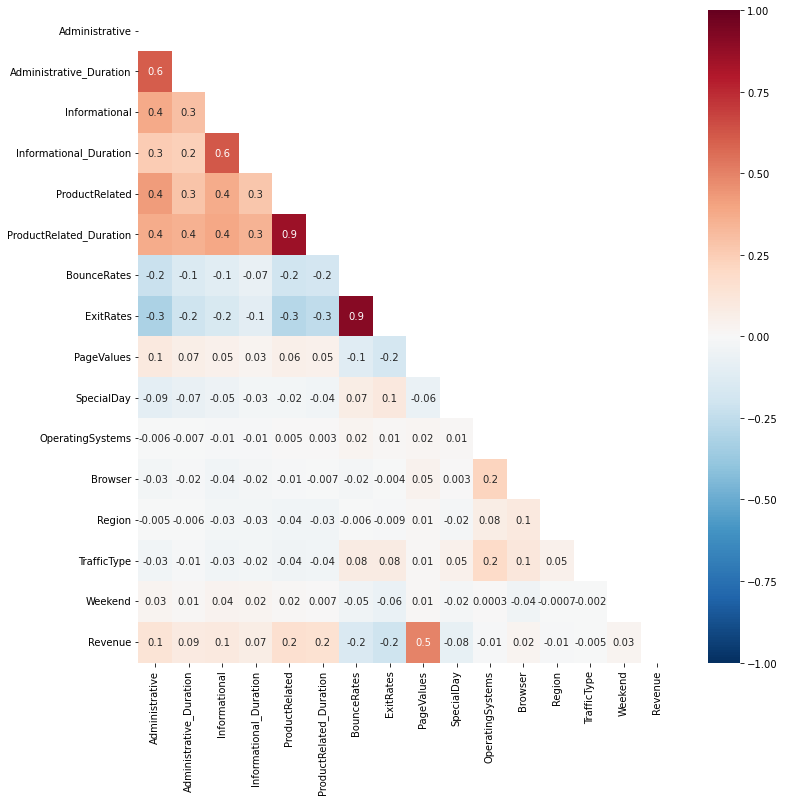

In [93]:
# Using heatmap to see correlation analysis of dataframe
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the graph plotted, I would consider "TrafficType" as a feature to drop. Since it has the least correlation score with the target "Revenue", and the correlation with other features also remain low (max: 0.2 with OS, which makes sense since traffictype is highly related to OS). By dropping this feature, it might reduce nosie of data, and the model might have a better training result.

__12. Given what you know about the limitations of RandomForests, engineer one additional feature, and discuss why you think it might help the model.__

Since in "OperatingSystems" feature, value 2 is responsible for around 6600 examples, and value 5 ~ 8 only responsible for a relatively small number of sample, we could combine 5 to 8 into 5 only, thus teh random forest would be faster as less separation exist.

In [94]:
df_train["OperatingSystems"].replace([6, 7, 8], 5, inplace=True)
df_holdout["OperatingSystems"].replace([6, 7, 8], 5, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


__13. Separate your training data into features and labels (X and y).__

In [95]:
y = df_train["Revenue"]
X = df_train.drop(["Revenue"], axis = 1)

__The labels for this dataset are highly imbalanced. Discuss and implement how you will handle this situation for this analysis.__

Use under-sampling to randomly choose out 1440 with "Revenue" of value 0 from 8559 examples.

In [96]:
df_train["Revenue"].value_counts()

0    8559
1    1440
Name: Revenue, dtype: int64

In [97]:
# Under-sampling to solve the imbalance

X_balanced, y_balanced = make_imbalance(X, y, sampling_strategy={0: 1440, 1: 1440},random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3)

__14. Instantiate a RandomForest model of your choosing. Define a grid to tune at least three different hyperparameters with at least two different values each. Discuss why you think these parameter values might be useful for this dataset.__

In [98]:
# The number of trees in the forest: (Since we have a decent amount of features and their values, a larger forest is needed)
# The maximum depth of the tree: (An early stop for preventing overfitting)
# The minimum number of samples required to be at a leaf node: (Also lead to an early stop for preventing overfitting)
# The number of features to consider when looking for the best split: (Might help prevent overfitting)
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [10,100,500,1000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,15,20,40],
                  'min_samples_split': [3,5,7]}

__15. Set up a gridsearchCV with 5-fold cross validation. Discuss what accuracy metric you chose and why.__

In [99]:
# Number of jobs to run in parallel: -1 (to improve speed)
CV_rfc = ms.GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs = -1)

__16. Train your model using gridsearchCV, and report the best performing hyperparameters.__<br>
__17. Calculate accuracy, precision and recall on the holdout dataset. Discuss which metric you think is most meaningful for this dataset, and why.__

In [100]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 40],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [10, 100, 500, 1000, 5000]})

In [170]:
CV_rfc.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

In [101]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=5,
                       n_estimators=1000)

In [105]:
# Test set performance
Op_rfc = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=3)
Op_rfc.fit(X_train,y_train)

Op_rfc_pre = Op_rfc.predict(X_test)

print('Random Forest Performance on test set:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, Op_rfc_pre))
print('F1 Score        : ', metrics.f1_score(y_test, Op_rfc_pre))
print('Precision       : ', metrics.precision_score(y_test, Op_rfc_pre))
print('Recall          : ', metrics.recall_score(y_test, Op_rfc_pre))

Random Forest Performance on test set:
--------------------------------
Accuracy        :  0.875
F1 Score        :  0.8761467889908258
Precision       :  0.8662131519274376
Recall          :  0.8863109048723898


In [108]:
# Holdout set performance
y_holdout = df_holdout["Revenue"]
X_holdout = df_holdout.drop(["Revenue"], axis = 1)

holdout_rfc_pre = Op_rfc.predict(X_holdout)

print('Random Forest Performance on Holdout:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_holdout, holdout_rfc_pre))
print('F1 Score        : ', metrics.f1_score(y_holdout, holdout_rfc_pre))
print('Precision       : ', metrics.precision_score(y_holdout, holdout_rfc_pre))
print('Recall          : ', metrics.recall_score(y_holdout, holdout_rfc_pre))

Random Forest Performance on Holdout:
--------------------------------
Accuracy        :  0.7996567996567997
F1 Score        :  0.6105087572977481
Precision       :  0.5006839945280438
Recall          :  0.782051282051282


In our case, the recall is more important, as a company, we want our profit maximized, so we do not care about "false possitive", but "false negative" (which means those who would purchase but missed by model)

__18. Discuss how the model performance on holdout compares to the model performance during training. Do you think your model will generalize well? Why or why not?__

As shown above, using the validation set (X_test,y_test), the recall acurracy is around 90%. for holdout set (X_holdout, y_holdout), the recall accuracy is around 80%. Since the scores different by 10% (and relatively high) ,so I think the model does overfit a little, but it still has a considerably good score (near 80%).

__19. Generate a confusion matrix and discuss your results.__

Confusion Matrix:
  [[1498  365]
 [ 102  366]]


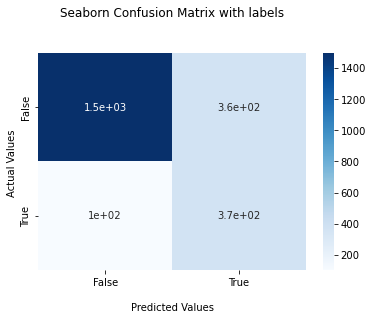

In [112]:
print('Confusion Matrix:\n ', confusion_matrix(y_holdout, holdout_rfc_pre))

ax = sns.heatmap(confusion_matrix(y_holdout, holdout_rfc_pre), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

For group 1 (the first vector in the matrix, represent "will not buy"), rate of correctness is around 81% <br>
For group 2 (the second vector in the matrix, represent "Will Buy"), rate of correctness is around 78% (which is the recall)

__20. Print out the feature importances of your model.__

Feature: 0, Score: 0.03524
Feature: 1, Score: 0.05255
Feature: 2, Score: 0.01399
Feature: 3, Score: 0.02137
Feature: 4, Score: 0.05739
Feature: 5, Score: 0.08102
Feature: 6, Score: 0.04705
Feature: 7, Score: 0.09095
Feature: 8, Score: 0.42038
Feature: 9, Score: 0.00575
Feature: 10, Score: 0.01494
Feature: 11, Score: 0.01527
Feature: 12, Score: 0.02387
Feature: 13, Score: 0.02418
Feature: 14, Score: 0.00723
Feature: 15, Score: 0.00415
Feature: 16, Score: 0.00454
Feature: 17, Score: 0.00075
Feature: 18, Score: 0.00512
Feature: 19, Score: 0.00304
Feature: 20, Score: 0.00838
Feature: 21, Score: 0.01226
Feature: 22, Score: 0.02291
Feature: 23, Score: 0.00394
Feature: 24, Score: 0.00785
Feature: 25, Score: 0.00767
Feature: 26, Score: 0.00026
Feature: 27, Score: 0.00791


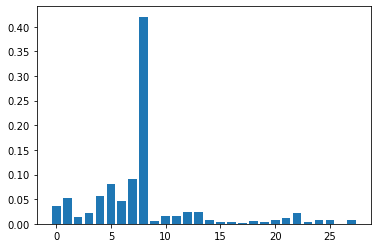

In [113]:
# Get importance
importance = Op_rfc.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature 8 (PageValues) is the highest among all

__21. Train and tune another decision-tree based model on your training dataset. Using the best performing hyperparameters, test this model on your holdout. How did it perform, compared to your earlier model? Do you think your results will generalize?__

In [114]:
gbc =  GradientBoostingClassifier()
param_grid = {'n_estimators': [135,140,145],
                  'min_samples_leaf': [12,15,17],
                  'max_depth': [55,60,65],
                  'min_samples_split': [5,6,7]} 

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3)
CV_gbc = ms.GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5, n_jobs = -1)
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [55, 60, 65],
                         'min_samples_leaf': [12, 15, 17],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [135, 140, 145]})

In [59]:
CV_gbc.best_params_

{'max_depth': 55,
 'min_samples_leaf': 17,
 'min_samples_split': 5,
 'n_estimators': 135}

In [115]:
# Test set performance
Op_gbc = GradientBoostingClassifier(max_depth=55, min_samples_leaf=17, min_samples_split=5, n_estimators=135)
Op_gbc.fit(X_train,y_train)

Op_gbc_pre = Op_gbc.predict(X_test)

print('Grandient Boosting Performance on test set:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, Op_gbc_pre))
print('F1 Score        : ', metrics.f1_score(y_test, Op_gbc_pre))
print('Precision       : ', metrics.precision_score(y_test, Op_gbc_pre))
print('Recall          : ', metrics.recall_score(y_test, Op_gbc_pre))

Grandient Boosting Performance on test set:
--------------------------------
Accuracy        :  0.8530092592592593
F1 Score        :  0.8558456299659478
Precision       :  0.835920177383592
Recall          :  0.8767441860465116


In [116]:
# Holdout set performance
holdout_gbc_pre = Op_gbc.predict(X_holdout)

print('Grandient Boosting Performance on Holdout:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_holdout, holdout_gbc_pre))
print('F1 Score        : ', metrics.f1_score(y_holdout, holdout_gbc_pre))
print('Precision       : ', metrics.precision_score(y_holdout, holdout_gbc_pre))
print('Recall          : ', metrics.recall_score(y_holdout, holdout_gbc_pre))

Grandient Boosting Performance on Holdout:
--------------------------------
Accuracy        :  0.767052767052767
F1 Score        :  0.5761124121779859
Precision       :  0.45387453874538747
Recall          :  0.7884615384615384


The Gradient Boosting Classifier results slightly lower accuracy than the Random Forest Classifier. Since the difference between the prediction based on validation set and holdout set is 10%, I think the the model does overfit (since the split of dataset is problematic), and result can not be considered as generalized.

__22. Next, repeat training and tuning on the same data with a LogisticRegression model. Do you need to do any additional feature cleaning or scaling here? Why or why not?__

In [163]:
# For now we need to use MinMaxScaler() to scale all features to range [0,1], as otherwise there would be a warning "bfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

lrm = LogisticRegression()

min_max_scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3)
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

lrm.fit(X_train_minmax,y_train)
lrm_pred = lrm.predict(X_test_minmax)
print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_test, lrm_pred))
print('Precision       : ', metrics.precision_score(y_test, lrm_pred))
print('Recall          : ', metrics.recall_score(y_test, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.7766203703703703
F1 Score        :  0.7804323094425484
Precision       :  0.7456521739130435
Recall          :  0.8186157517899761


In [164]:
# Tuning the hyperparameters for GridSearchCV

lrm_param_grid = {'C': [35, 38, 40, 42, 45],  
              'solver': ['newton-cg', 'lbfgs', 'saga'],
                 'max_iter': [100, 150, 200, 300]}

lrm_grid = ms.GridSearchCV(lrm,
                        lrm_param_grid,
                        refit=True,
                        n_jobs=-1)

lrm_grid.fit(X_train_minmax,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [35, 38, 40, 42, 45],
                         'max_iter': [100, 150, 200, 300],
                         'solver': ['newton-cg', 'lbfgs', 'saga']})

In [165]:
lrm_grid.best_params_

{'C': 45, 'max_iter': 100, 'solver': 'newton-cg'}

In [166]:
# Test set performance after tunning
lrm_grid = LogisticRegression(C=45,solver='newton-cg',max_iter=100)
lrm_grid.fit(X_train_minmax,y_train)
lrm_grid_pred = lrm_grid.predict(X_test_minmax)

print('Logistic Regression Tuned Performance on test set:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_test, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_test, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_test, lrm_grid_pred))

Logistic Regression Tuned Performance on test set:
--------------------------------------
Accuracy        :  0.8275462962962963
F1 Score        :  0.8202653799758746
Precision       :  0.8292682926829268
Recall          :  0.8114558472553699


In [167]:
# Holdset set performance
X_holdout_minmax = min_max_scaler.fit_transform(X_holdout)
lrm_grid_pred_holdout = lrm_grid.predict(X_holdout_minmax)

print('Logistic Regression Tuned Performance on holdout set:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_holdout, lrm_grid_pred_holdout))
print('F1 Score        : ', metrics.f1_score(y_holdout, lrm_grid_pred_holdout))
print('Precision       : ', metrics.precision_score(y_holdout, lrm_grid_pred_holdout))
print('Recall          : ', metrics.recall_score(y_holdout, lrm_grid_pred_holdout))

Logistic Regression Tuned Performance on holdout set:
--------------------------------------
Accuracy        :  0.7906477906477907
F1 Score        :  0.6006546644844517
Precision       :  0.48673740053050396
Recall          :  0.7841880341880342


__Some thinking about the paper__

In the paper, the author uses random forest, support vector machines ,and multilayer perceptron for training. As a result, the MLP classifier has a higher accuracy comparing to the rest classifiers. It is interesting to see that the results of these three algorithms improved magnificantly by equalize the samples with oversampling (TPR and F1 score from around 0.5 to 0.8). The feature selection proccess is also a new idea for me, and it seems important for data cleaning. The applied of feature ranking method called minimum redundancy–maximum relevance is inspiring, as it provided a way to choose a subset of session information-based data and clickstream-based data to reduce feature correlation and improve the accuracy. 